In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [49]:
df = pd.read_csv("employee_salary_data.csv")
print(" Dataset Loaded Successfully!\n")
print(df.head())

 Dataset Loaded Successfully!

           Job Title  YearsExperience EducationLevel       Location  Age  \
0  Software Engineer                3       Bachelor       New York   25   
1     Data Scientist                5         Master  San Francisco   29   
2    Project Manager                8         Master        Chicago   35   
3      Web Developer                2       Bachelor         Austin   24   
4      HR Specialist                4       Bachelor       New York   28   

   Gender  Salary  
0    Male   85000  
1  Female  125000  
2    Male  115000  
3  Female   65000  
4  Female   72000  


In [ ]:
print("\n Dataset Info:")
print(df.info())

print("\n Missing Values:")
print(df.isnull().sum())

print("\n Statistical Summary:")
print(df.describe())



 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Job Title        20 non-null     object
 1   YearsExperience  20 non-null     int64 
 2   EducationLevel   20 non-null     object
 3   Location         20 non-null     object
 4   Age              20 non-null     int64 
 5   Gender           20 non-null     object
 6   Salary           20 non-null     int64 
dtypes: int64(3), object(4)
memory usage: 1.2+ KB
None

 Missing Values:
Job Title          0
YearsExperience    0
EducationLevel     0
Location           0
Age                0
Gender             0
Salary             0
dtype: int64

 Statistical Summary:
       YearsExperience    Age         Salary
count        20.000000  20.00      20.000000
mean          5.350000  30.00   99050.000000
std           2.300458   4.00   27948.213388
min           2.000000  24.00   58000.000

In [ ]:
print("\n Performing Exploratory Data Analysis (EDA)...")


 Performing Exploratory Data Analysis (EDA)...


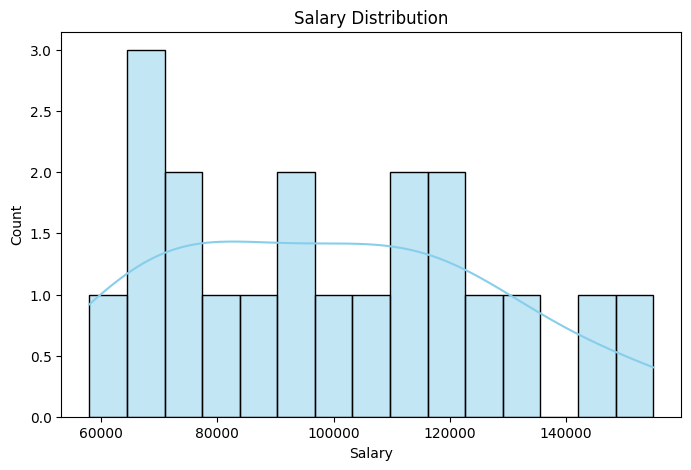

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['Salary'], bins=15, kde=True, color='skyblue')
plt.title("Salary Distribution")
plt.xlabel("Salary")
plt.ylabel("Count")
plt.show()

/tmp/ipython-input-2256455422.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="EducationLevel", y="Salary", palette="viridis")


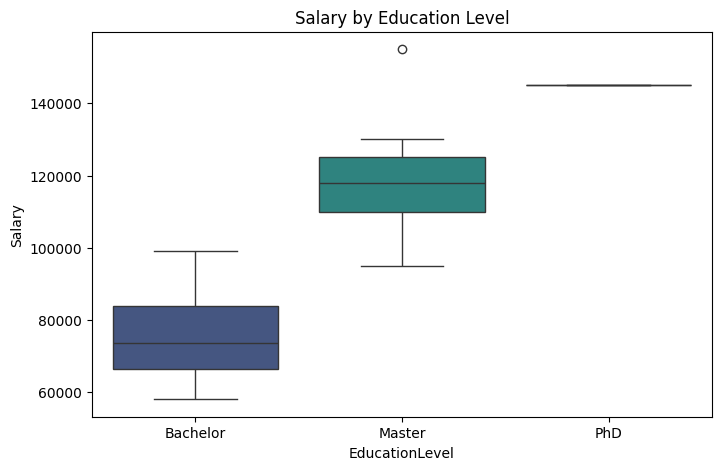

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="EducationLevel", y="Salary", palette="viridis")
plt.title("Salary by Education Level")
plt.show()


/tmp/ipython-input-2396318155.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Job Title", y="Salary", estimator=np.mean, palette="coolwarm")


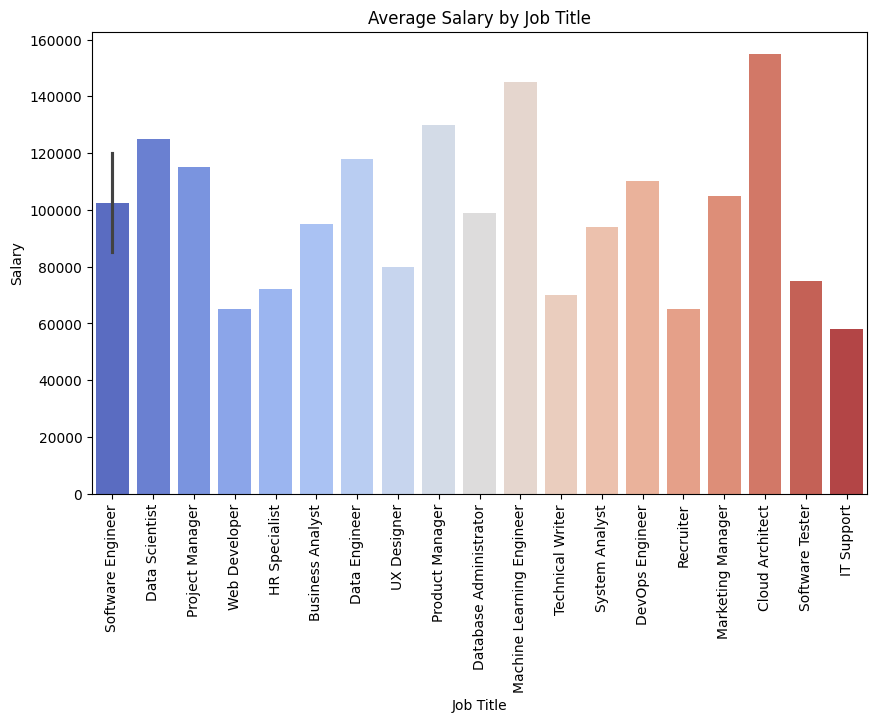

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x="Job Title", y="Salary", estimator=np.mean, palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Average Salary by Job Title")
plt.show()

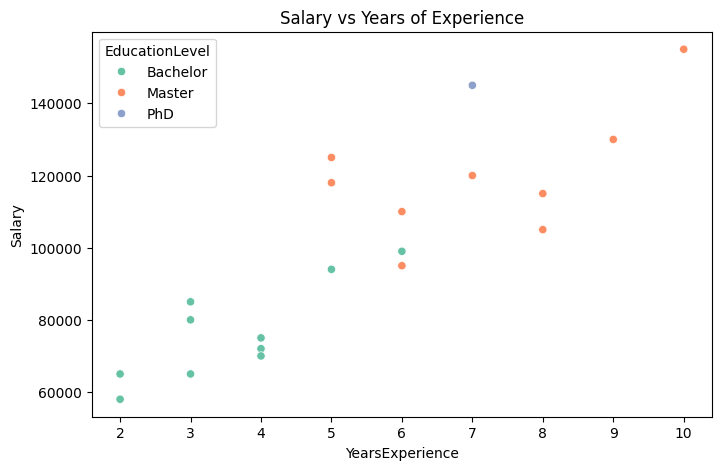

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="YearsExperience", y="Salary", hue="EducationLevel", palette="Set2")
plt.title("Salary vs Years of Experience")
plt.show()

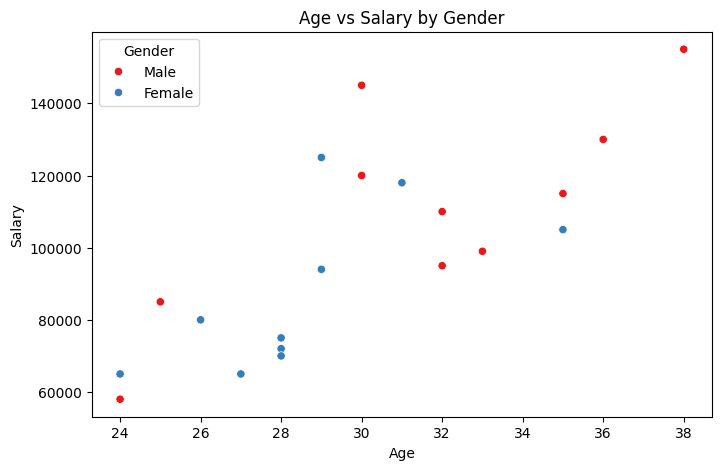

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="Age", y="Salary", hue="Gender", palette="Set1")
plt.title("Age vs Salary by Gender")
plt.show()

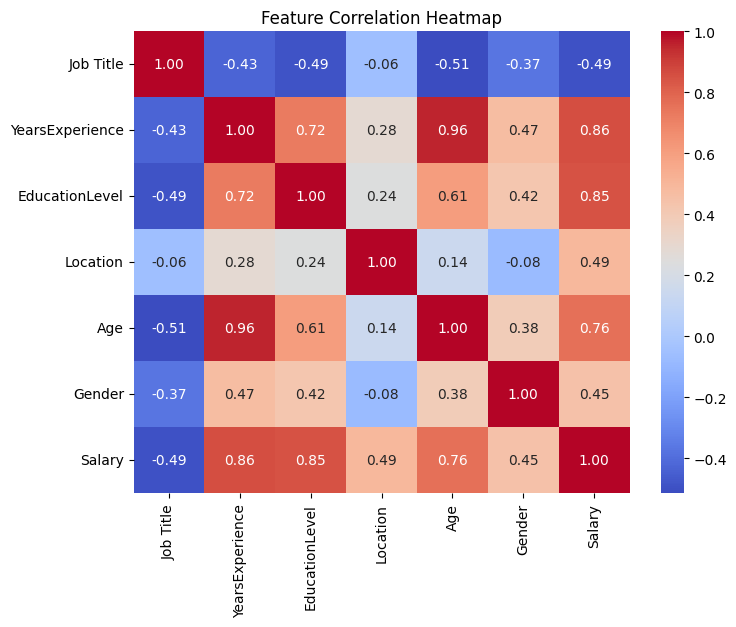

In [ ]:
temp_df = df.copy()
le = LabelEncoder()
for col in ["Job Title", "EducationLevel", "Location", "Gender"]:
    temp_df[col] = le.fit_transform(temp_df[col])

plt.figure(figsize=(8,6))
sns.heatmap(temp_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
le = LabelEncoder()
for col in ["Job Title", "EducationLevel", "Location", "Gender"]:
    df[col] = le.fit_transform(df[col])

In [ ]:
X = df.drop("Salary", axis=1)
y = df["Salary"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
print("\n Simple Linear Regression (YearsExperience -> Salary)")

X_simple = df[["YearsExperience"]]
y_simple = df["Salary"]

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_simple, y_simple, test_size=0.2, random_state=42)

lr_simple = LinearRegression()
lr_simple.fit(X_train_s, y_train_s)
y_pred_s = lr_simple.predict(X_test_s)

print("R² Score:", r2_score(y_test_s, y_pred_s))
print("MSE:", mean_squared_error(y_test_s, y_pred_s))


 Simple Linear Regression (YearsExperience -> Salary)
R² Score: 0.7231238199580404
MSE: 337442844.4261382


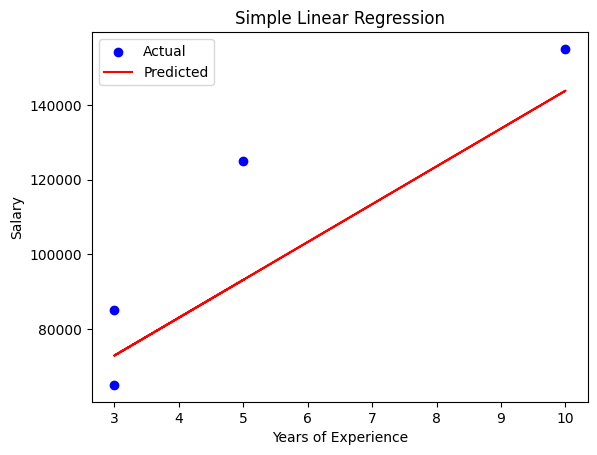

In [ ]:
plt.scatter(X_test_s, y_test_s, color="blue", label="Actual")
plt.plot(X_test_s, y_pred_s, color="red", label="Predicted")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Simple Linear Regression")
plt.legend()
plt.show()


 Multiple Linear Regression
R² Score: 0.6684778061741878
MSE: 404042673.7252086


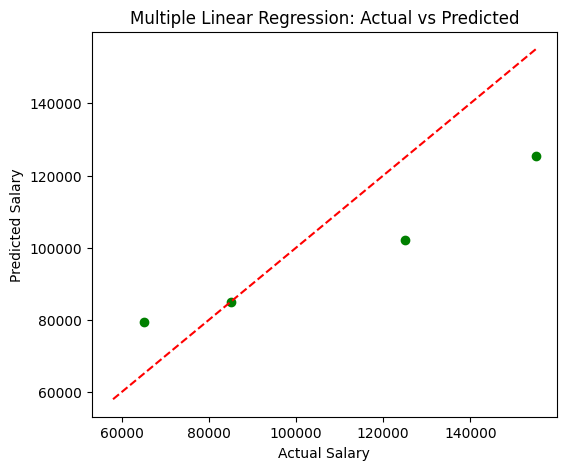

In [ ]:
print("\n Multiple Linear Regression")

lr_multi = LinearRegression()
lr_multi.fit(X_train, y_train)
y_pred_multi = lr_multi.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred_multi))
print("MSE:", mean_squared_error(y_test, y_pred_multi))

plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred_multi, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title("Multiple Linear Regression: Actual vs Predicted")
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.show()


 Polynomial Regression
R² Score: 0.334107046484478
MSE: 811557037.0970424


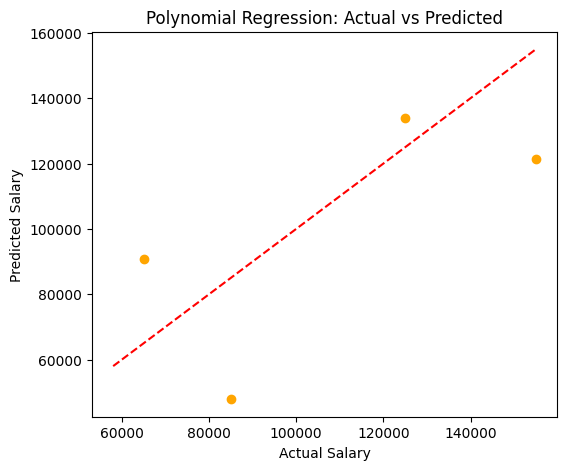

In [ ]:
print("\n Polynomial Regression")

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

poly_model = LinearRegression()
poly_model.fit(X_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)

print("R² Score:", r2_score(y_test, y_pred_poly))
print("MSE:", mean_squared_error(y_test, y_pred_poly))

plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred_poly, color='orange')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title("Polynomial Regression: Actual vs Predicted")
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.show()


 Decision Tree Regression
R² Score: 0.670974358974359
MSE: 401000000.0


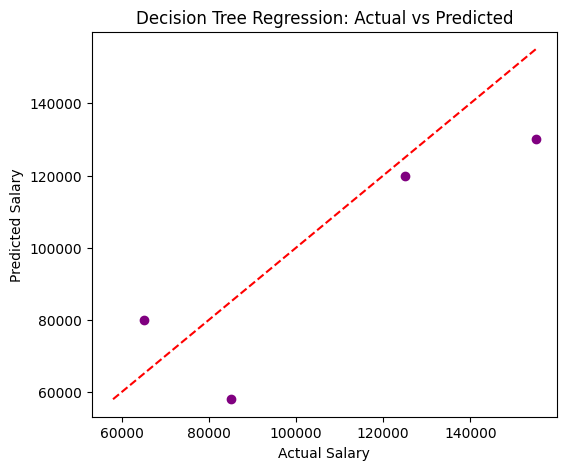

In [ ]:
print("\n Decision Tree Regression")

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred_dt))
print("MSE:", mean_squared_error(y_test, y_pred_dt))

plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred_dt, color='purple')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title("Decision Tree Regression: Actual vs Predicted")
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.show()


 Random Forest Regression
R² Score: 0.6770434871794873
MSE: 393603250.0


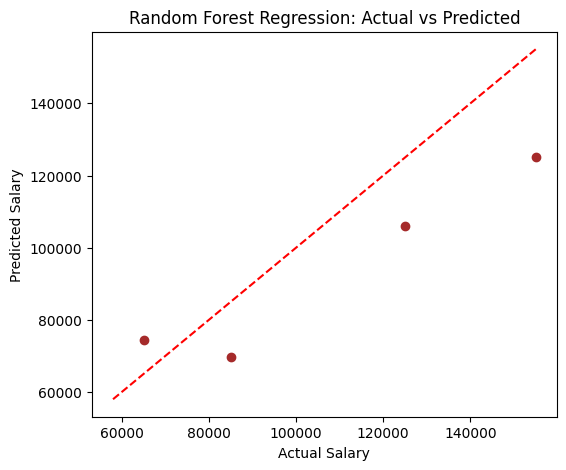

In [ ]:
print("\n Random Forest Regression")

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))

plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred_rf, color='brown')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title("Random Forest Regression: Actual vs Predicted")
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.show()


 Support Vector Regression (SVR)
R² Score: -0.09038569965541066
MSE: 1328907571.4550316


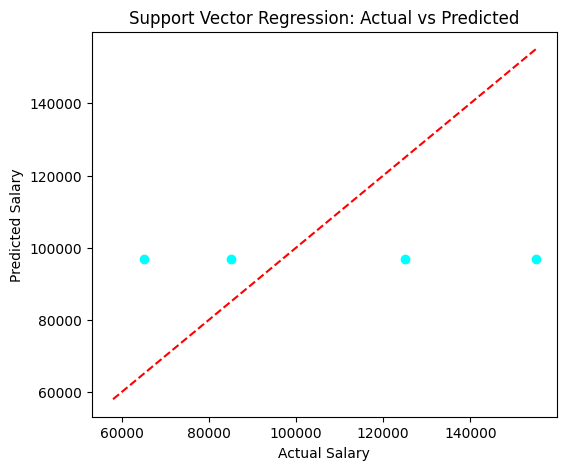

In [ ]:
print("\n Support Vector Regression (SVR)")

svr = SVR(kernel='rbf')
svr.fit(X_train_scaled, y_train)
y_pred_svr = svr.predict(X_test_scaled)

print("R² Score:", r2_score(y_test, y_pred_svr))
print("MSE:", mean_squared_error(y_test, y_pred_svr))

plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred_svr, color='cyan')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title("Support Vector Regression: Actual vs Predicted")
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.show()


🏁 Model Comparison:

                        Model  R2 Score
0    Simple Linear Regression  0.723124
4               Random Forest  0.677043
3               Decision Tree  0.670974
1  Multiple Linear Regression  0.668478
2       Polynomial Regression  0.334107
5   Support Vector Regression -0.090386


/tmp/ipython-input-2907632266.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results, x="Model", y="R2 Score", palette="viridis")


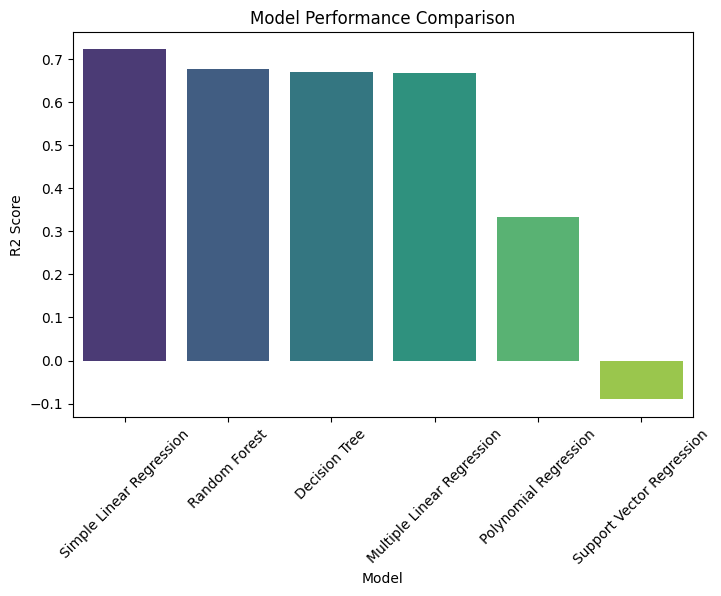

In [ ]:
models = {
    "Simple Linear Regression": r2_score(y_test_s, y_pred_s),
    "Multiple Linear Regression": r2_score(y_test, y_pred_multi),
    "Polynomial Regression": r2_score(y_test, y_pred_poly),
    "Decision Tree": r2_score(y_test, y_pred_dt),
    "Random Forest": r2_score(y_test, y_pred_rf),
    "Support Vector Regression": r2_score(y_test, y_pred_svr)
}

results = pd.DataFrame(list(models.items()), columns=["Model", "R2 Score"]).sort_values(by="R2 Score", ascending=False)
print("\n🏁 Model Comparison:\n")
print(results)

plt.figure(figsize=(8,5))
sns.barplot(data=results, x="Model", y="R2 Score", palette="viridis")
plt.xticks(rotation=45)
plt.title("Model Performance Comparison")
plt.show()

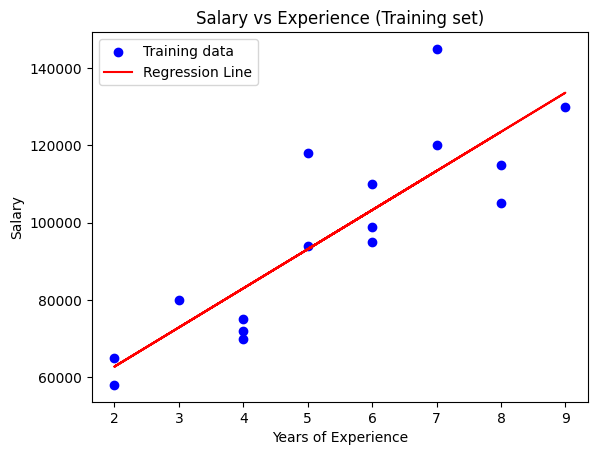

In [ ]:
plt.scatter(X_train_s['YearsExperience'], y_train_s, color='blue', label='Training data')
plt.plot(X_train_s['YearsExperience'], lr_simple.predict(X_train_s), color='red', label='Regression Line')
plt.title("Salary vs Experience (Training set)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend()
plt.show()

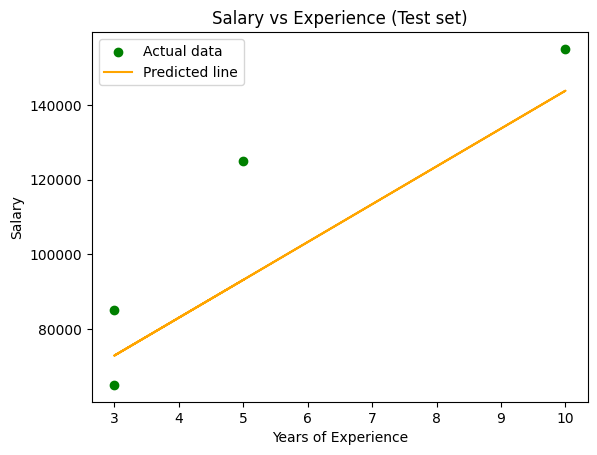

In [ ]:
plt.scatter(X_test_s, y_test_s, color='green', label='Actual data')
plt.plot(X_test_s, y_pred_s, color='orange', label='Predicted line')
plt.title("Salary vs Experience (Test set)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend()
plt.show()

In [ ]:
exp = float(input("Enter Years of Experience: "))
pred_salary = lr_simple.predict([[exp]])
print(f"\n Predicted Salary for {exp} years of experience: ₹{pred_salary[0]:.2f}")

Enter Years of Experience: 33

 Predicted Salary for 33.0 years of experience: ₹376806.27


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
